## EECS491 A4 E3
### Tristan Maidment (tdm47)

#### Goal
The purpose of this assignment apply PCA to the mnist dataset, and plot the first couple principle components.  In addition, we can display the distribution of values of each digit with respect to the principle components.

#### Implementation

In [1]:
%matplotlib inline 
import numpy as np 
import math 
import cv2 
from matplotlib import pyplot as plt 
import mnist
from sklearn.decomposition import PCA 
from mpl_toolkits.mplot3d import Axes3D

In [2]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

To make sure the mnist dataset was imported correctly, we will plot the 256th digit, which happens to be number 3.  This digit will be used for reconstruction later.

3


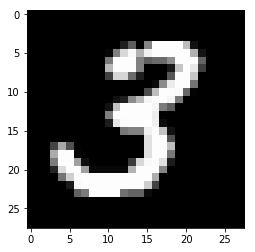

In [3]:
plt.imshow(train_images[255], cmap='gray')
print(train_labels[255])
plt.show()

In order to properly run PCA on the dataset, it must be vectorized.  Fortunately, we append the rows of the images to each other, changing the `28*28` image to a `784` length vector.

In [4]:
n, h, w = train_images.shape 
X = np.reshape(train_images,(n, h*w))
print(X.shape)

(60000, 784)


I wanted to learn how PCA worked, and realized that the algorithm is fairly straightforward after reading the textbook.  Using the algorithm defined on page 327, we can define PCA fairly easily.

The first step is to find the mean `m` of the vector.  We then shift the dataset via that mean, to create an equal distribution of data values around 0.  This step is not necessary, and can be captured via the first principle component, but is generally used.

Next, I find the covariance matrix `S` of the dataset, using the new shifted dataset.

Finally, I calculate the eigenvalues `w` and eigenvectors `v` from the covariance matrix, which is sorted by magnitude (variance in the dataset).

Finally the transform of the whole dataset is executed `Y`, with respect to the correct order of principle components.

In [5]:
# adapted from page 327 of the class textbook
def pca(X):

    m = np.mean(X, axis=0)
    X = np.subtract(X, m)

    S = np.dot(X.T, X)

    w, v = np.linalg.eig(S) #values, vectors
    Y = np.dot(X, v[:,np.argsort(w)[::-1]])
    return Y, m, v

To convert the data back to the original data space, we must un-vectorize the output as well as define the ability to reverse the transform.  Using the transform and a summation of components, we can reconstruct the original image using the first `k` components.

In [6]:
def reconstruct(mean, transform, components, k):
    return mean + np.dot(transform[:,:k], components[:,:k].T)
def plot_vector(vec):
    size = 28
    img = vec.reshape(size, size) 
    return img

In [7]:
transform, mean, components = pca(X)

To visualize the effects of PCA, we can plot the first couple principle components.

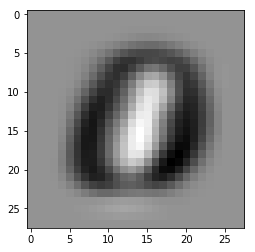

In [8]:
plt.imshow(plot_vector(components[:,0]), cmap = 'gray')
plt.show()

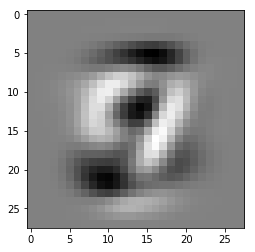

In [9]:
plt.imshow(plot_vector(components[:,1]), cmap = 'gray')
plt.show()

In addition, we can visualize the representation of the digits in the transformed space.  For instance, this is a representation of the `3` seen earlier in the notebook.

(60000, 784)


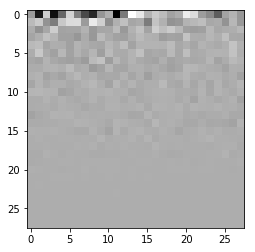

In [10]:
print(transform.shape)
plt.imshow(plot_vector(transform[255,:]), cmap='gray')

In addition, using the `reconstruction` algorithm defined earlier, we can create a representation of that `3` with the first `25` principle components.  It looks remarkably similar to the original representation.

(60000, 784)


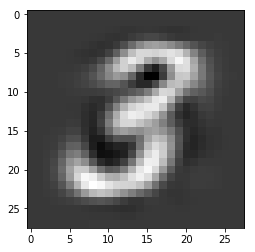

In [11]:
reconstruction = reconstruct(mean, transform, components, 25)
print(reconstruction.shape)
plt.imshow(plot_vector(reconstruction[255,:]), cmap='gray')
plt.show()

Furthermore, we can create a scatter plot of the value of each datapoint in the data set with respect to the first and second principle component.  Each data point represents a single digit in the dataset.  The position of the points represents whether or not the data point is a closer representation to the high intensity data or low intensity data, respectively.

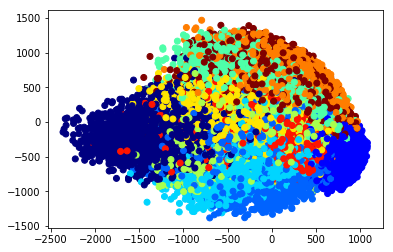

In [12]:
plt.scatter(transform[:,0], transform[:,1], c=train_labels, cmap=plt.cm.get_cmap('jet', 10))
plt.show()

Although some of variance of the mnist dataset can be captured via the first two principle components, there is a lot of "noise" in the center, which cannot be classified easily.  We can increase the ability to decipher the data by plotting the data along three dimensions.

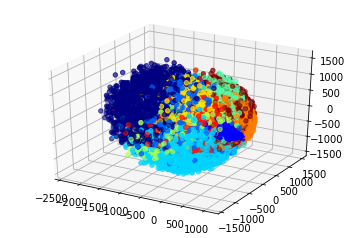

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transform[:,0], transform[:,1], transform[:,2],
c=train_labels, cmap=plt.cm.get_cmap('jet', 10))
plt.show()

### Conclusion
Although I have worked with PCA before, implementation of the technique by hand solidified my understanding of the methodology and theory behind it.